<a href="https://colab.research.google.com/github/jks5177/BigAI/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_7_%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%98%81%ED%99%94%ED%8F%89_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연습문제
* 네이버 영화평 자료로 딥러닝 감정분석을 수행하시오.

  * 이제까지의 내용을 종합적으로 활용해야 한다.
    * 한글데이터의 로디오가 형태소분석 - 빈도분석과 감성분석
    * 딥러닝의 사용 - IMDB 텍스트 이진분류
    * 자료형의 선택(문자열, 리스트, 넘파이 배열)

# 사전 설정


## RHINO 설치

In [ ]:
# java jdk 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Hit:13 http://ppa.launchpad.net

In [ ]:
#JPype 설치
!pip install JPype1

     |████████████████████████████████| 448 kB 9.0 MB/s 


In [ ]:
# RHINO 설치
!pip install rhinoMorph

     |████████████████████████████████| 3.0 MB 13.0 MB/s 


In [ ]:
# RHINO 시작
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!


## 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp -r /content/gdrive/MyDrive/BigLeaderAI/자연어처리 /content/

In [ ]:
%cd /content/gdrive/MyDrive/BigLeaderAI/자연어처리/pytest/

/content/gdrive/MyDrive/BigLeaderAI/자연어처리/pytest


## Colab 폰트 설정

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # 폰트가 깨끗하게 보이도록 설정

!apt install fonts-nanum # 나눔 폰트 설치

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumMyeongjo')

#런타임 > 런타임 다시 시작 수행 후 다시 진행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 80 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,573 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 161413 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


# 데이터 로딩

In [ ]:
# 읽기 함수 정의
def read_data(filename, encoding='cp949', start_line=1) :
  with open(filename, 'r', encoding=encoding) as f :
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[start_line:]
  return data

#쓰기 함수도 정의
def write_data(data, filename, encoding='cp949') :
  with open(filename, 'w', encoding=encoding) as f :
    f.write(data)

In [ ]:
# 전체파일은 ratings.txt
data = read_data('ratings_small.txt') # 상대 경로

# 데이터 확인

In [ ]:
print(len(data))
print(len(data[0]))
print(data[0])
print(data[0:3])

500
3
['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']
[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'], ['8132799', '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1'], ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1']]


# 전체 데이터 형태소 분석

In [ ]:
import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data = ''
for data_each in data :
  morphed_data_each = rhinoMorph.onlyMorph_list(
      rn, data_each[1], pos = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
  joined_data_each = ' '.join(morphed_data_each)
  if joined_data_each :
    morphed_data += data_each[0]+'\t'+joined_data_each+'\t'+data_each[2]+'\n'

# 형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed.txt')

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


# 분석된 데이터 로딩

In [ ]:
data = read_data('ratings_morphed.txt', start_line=0)
print(len(data))
print(len(data[0]))

texts = [line[1] for line in data] # 데이터의 본문
labels = [line[2] for line in data] # 데이터의 긍부정 (1:긍정, 0:부정)

495
3


# Data 확인

In [ ]:
print('texts 0 : ', texts[0])
print('texts len : ', len(texts))

print('labels 0 : ', labels[0])
print('labels len : ', len(labels))

print('texts type : ', type(texts))

texts 0 :  어리 때 보 지금 다시 보 재미있 ㅋㅋ
texts len :  495
labels 0 :  1
labels len :  495
texts type :  <class 'list'>


# Data Tokenizing

* 텍스트에 사용된 단어의 종류를 빈도 순으로 정렬하는 작업을 수행한다.

In [ ]:
%tensorflow_version 2.x
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

validation_ratio = math.floor(len(texts) * 0.3) # validation 생성
max_words = 10000 # 데이터셋에서 가장 빈도가 높은 9,999개의 단어만 사용한다. 남은 1개는 padding 0을 위해 남겨놓음
maxlen = 100 # 항상 각 문장의 길이가 200 단어가 되도록 고정

tokenizer = Tokenizer(num_words=max_words) # 상위빈도 max_words 개의 단어를 추려내는 Tokenizer 객체 생성
tokenizer.fit_on_texts(texts) # texts 내용에 대한 단어 인덱스를 구축한다. 사용할 단어가 결정된다.
word_index = tokenizer.word_index # 단어와 인덱스의 쌍을 가져온다.

# Tokenizing 결과 확인

In [ ]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.'%len(word_index))
print('word_index type: ', type(word_index))
print('word_index: ', word_index)

전체에서 1750개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>
word_index:  {'영화': 1, '보': 2, '하': 3, '없': 4, 'ㅋㅋ': 5, '정말': 6, '너무': 7, '있': 8, '좋': 9, '재미있': 10, '되': 11, '진짜': 12, '연기': 13, '같': 14, '말': 15, '만들': 16, '왜': 17, '다': 18, '최고': 19, 'ㅋ': 20, '잘': 21, '때': 22, '나오': 23, '사람': 24, '아깝': 25, '안': 26, '감동': 27, '평점': 28, '모르': 29, '이': 30, '재미': 31, '이런': 32, '알': 33, '드라마': 34, '다시': 35, '배우': 36, '그': 37, '가': 38, 'ㅠ': 39, '한국': 40, '스토리': 41, '재미없': 42, '생각': 43, '시간': 44, '내용': 45, '못': 46, '더': 47, '주': 48, '마음': 49, 'ㅠㅠ': 50, '감독': 51, '이쁘': 52, '지금': 53, '대하': 54, '명작': 55, '아': 56, '내내': 57, 'ㅎㅎ': 58, '처음': 59, '그런': 60, '좋아하': 61, '전': 62, 'ㅡㅡ': 63, '웃기': 64, '주인공': 65, '돈': 66, '지루': 67, '완전': 68, '굿': 69, '작품': 70, '장면': 71, '남자': 72, '액션': 73, '무슨': 74, '수': 75, '많': 76, '원작': 77, '10점': 78, '최악': 79, '끝': 80, '와': 81, '일본': 82, '남': 83, '그렇': 84, '그냥': 85, 'ㅎ': 86, '받': 87, '인생': 88, '쓰레기': 89, '참': 90, '짱': 91, '잼': 92, '들': 93, '답답': 94, '사실': 95, '생각하': 96, '웃'

# Data Sequencing

In [ ]:
# 각 문장에서 상위 빈도 9,999(max_words)개의 단어만 추출하여 word_index의 숫자를 가지는 리스트로 변환한다.

text_data = tokenizer.texts_to_sequences(texts) # 빈도 10,000의 Tokenizer결과가 여기서 반영된다.

print('data0:', text_data[0])

print('texts0 : ', texts[0])

data0: [116, 22, 2, 53, 35, 2, 10, 5]
texts0 :  어리 때 보 지금 다시 보 재미있 ㅋㅋ


# Data Padding

In [ ]:
from keras.preprocessing.sequence import pad_sequences

text_data = pad_sequences(text_data, maxlen=maxlen)

print('data:', text_data)
print('data0 : ', text_data[0])
print(len(text_data[0]))

data: [[   0    0    0 ...    2   10    5]
 [   0    0    0 ...  329    8  583]
 [   0    0    0 ...  586    4   19]
 ...
 [   0    0    0 ...  543 1746 1747]
 [   0    0    0 ...    2   84    5]
 [   0    0    0 ...  322  322  322]]
data0 :  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 116  22   2  53  35   2  10   5]
100


# One-Hot Encoding

In [ ]:
def to_one_hot(sequences, dimension) :
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences) :
    results[i, sequences] = 1.
  return results  

In [ ]:
text_data = to_one_hot(text_data, dimension=max_words)
labels = np.asarray(labels).astype('float32')

# One-Hot Encoding 결과 확인

In [ ]:
print('text_data : ', text_data)

print(len(data[0]))
print('text_data[0][0:100] : ', text_data[0][0:100])

text_data :  [[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
3
text_data[0][0:100] :  [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


# Train 데이터와 Validation 데이터 준비

In [ ]:
print('데이터 텐서의 크기 :', text_data.shape)
print('레이블 텐서의 크기 : ', labels.shape)

indices = np.arange(text_data.shape[0])
np.random.shuffle(indices)
text_data = text_data[indices]
labels = labels[indices]

print(indices)

데이터 텐서의 크기 : (495, 10000)
레이블 텐서의 크기 :  (495,)
[441 289 270 475 494  50  39 127 146 369  25 217 272  69 228 168 361 267
  35 317 400  86 418 148   3 214 390 323 111 387  62 433  70 414 338 281
 237 431 348 220 153 429 145 459  13 331 336 213  10 401 391  42 425 477
 163  68 149  15  93 155 239 432 227 439 285 143  32  71 203 290 462 252
 124 328 309 299 104  26 166 407 250 144 423 404  75  74 395 164 350 355
 324  46 326 181 150  64 453 212 329 283 392 314 464 268 442 292 184  59
  14 454 165 286 160  83 126 340 260  56 357 282 327 371 394 223  72 380
  23  41 445 312  98 492 385 479 472  24 456 493 339 322 398 103  97 374
 179 141  89 296  18  95 123 315 344 206  55 276  76 253 263 280 291 265
 415  52 411 318   7  85 377 341 197 279  45  61 381 422 185   8 325 412
 448  99 403 482 461 307 177 133 183  38 364 140 226 234 319  16  90 484
  36 261  96  53  34  17 151 363 167 446 205 345  60 194 302 375 465 467
 130 424  37 258 447 218 409  67 156 310 353 284 244 158 273 152 471 117
 443

# TrainSet, TestSet, ValidationSet 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_data, labels, test_size=0.2)


X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 모델 정의하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 요약 출력

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


# 모델 요약 출력

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


# Compile & Train Model

In [ ]:
import tensorflow as tf
from tensorflow import keras

#콜백 생성
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5")
run_index = 1 # 모델을 훈련할 때마다 증가시킴

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [ ]:
run_logdir = '/content/자연어처리/pytest/my_cifar10_basic_logs_test'
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
10/10 [==============================] - 3s 77ms/step - loss: 0.6925 - acc: 0.4937 - val_loss: 0.6932 - val_acc: 0.4875
Epoch 2/10
10/10 [==============================] - 0s 10ms/step - loss: 0.6569 - acc: 0.8418 - val_loss: 0.6876 - val_acc: 0.5500
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 0.5957 - acc: 0.9019 - val_loss: 0.6765 - val_acc: 0.6375
Epoch 4/10
10/10 [==============================] - 0s 10ms/step - loss: 0.5073 - acc: 0.9525 - val_loss: 0.6530 - val_acc: 0.6625
Epoch 5/10
10/10 [==============================] - 0s 10ms/step - loss: 0.4113 - acc: 0.9589 - val_loss: 0.6267 - val_acc: 0.6375
Epoch 6/10
10/10 [==============================] - 0s 10ms/step - loss: 0.3214 - acc: 0.9620 - val_loss: 0.6015 - val_acc: 0.6375
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2482 - acc: 0.9620 - val_loss: 0.5917 - val_acc: 0.6500
Epoch 8/10
10/10 [==============================] - 0s 9ms/step - loss: 0.1896 - ac

# Save Model

In [ ]:
!pwd

/content/자연어처리/pytest


In [ ]:
# multidimensional numpy arrays를 저장할 수 있는 h5 file(HDF) 포맷으로 저장한다.
model.save('text_binary_model.h5')

In [ ]:
# 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
# 새로 입력된 문장에서도 같은 단어가 추출되게 한다.
import pickle
with open('text_binary_tokenizer.pickle', 'wb') as handle :
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Accuracy & Loss 확인

In [ ]:
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch : ', acc)
epochs = range(1, len(acc) + 1)

Accuracy of each epoch :  [0.49367088079452515, 0.8417721390724182, 0.9018987417221069, 0.952531635761261, 0.9588607549667358, 0.9620253443717957, 0.9620253443717957, 0.9746835231781006, 0.9778481125831604, 0.9810126423835754]


# Plotting Accuracy

findfont: Font family ['NanumMyeongjo'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumMyeongjo'] not found. Falling back to DejaVu Sans.


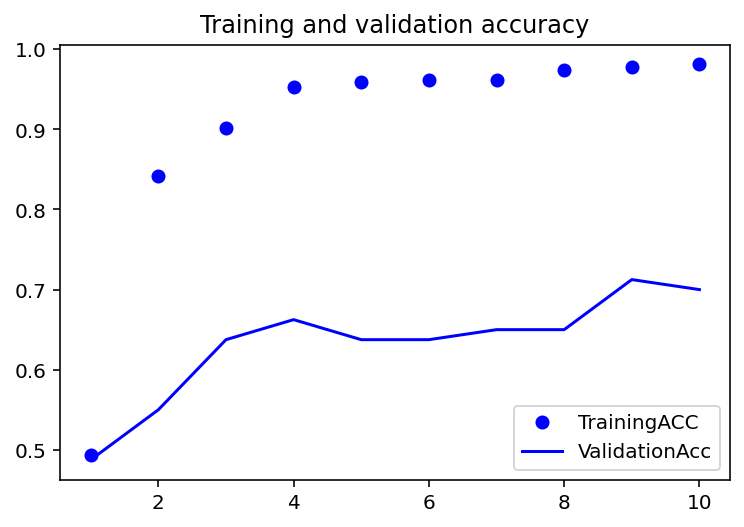

In [ ]:
import matplotlib.pyplot as plt

# 훈련데이터의 정확도에 비해 검증데이터의 정확도는 낮게 나타난다.
# epoch가 늘어나면서 모델은 훈련데이터에 매우 민감해져(과대적합) 오히려 새로운 데이터를 잘 못 맞춘다.
plt.plot(epochs, acc, 'bo', label='TrainingACC')
plt.plot(epochs, val_acc, 'b', label='ValidationAcc')
plt.title('Training and validation accuracy')
plt.legend()

# Plotting Loss

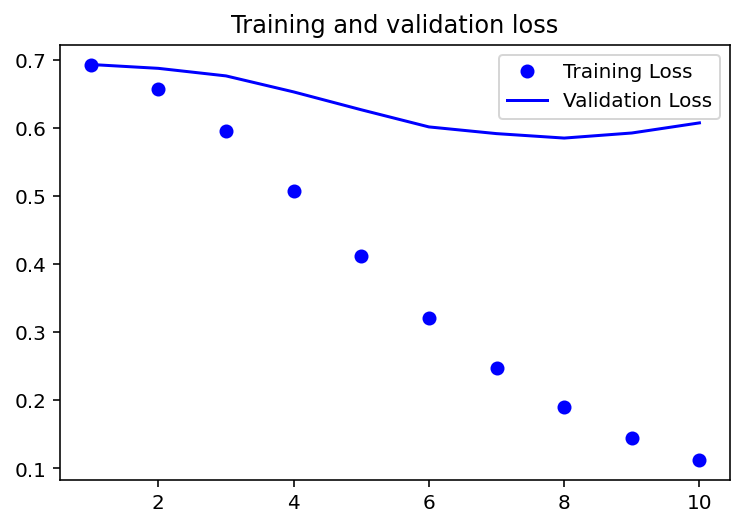

In [ ]:
plt.figure()

# 훈련데이터의 손실값은 낮아지나, 검증데이터의 손실값은 높아진다.
# 손실값은 오류값을 말한다. 예측과 정답의 차이를 거리 계산으로 구한 값이다.
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Load Model

In [ ]:
import os
from tensorflow.keras.models import load_model

filepath = '/content/자연어처리/pytest/'
os.chdir(filepath)
print('Current Directory :', os.getcwd())

loaded_model = load_model('text_binary_model.h5')
print('model loaded : ', loaded_model)

with open('text_binary_tokenizer.pickle', 'rb') as handle :
  loaded_tokenizer = pickle.load(handle)

Current Directory : /content/자연어처리/pytest
model loaded :  <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fcaa704f090>


# Test Data 확인

In [ ]:
print('X_test :', X_test)

X_test : [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
test_eval = loaded_model.evaluate(X_test, y_test)
print('prediction model loss & acc : ', test_eval)

4/4 [==============================] - 0s 3ms/step - loss: 0.5506 - acc: 0.6970
prediction model loss & acc :  [0.5505521297454834, 0.6969696879386902]
